# **FAANG Features Selection via [XGBoost](measurementsUsed/xgboost.md)**
- extract features for neural networks to improve model accuracy and boost training 
---

### Import Libraries 

In [1]:
import os
import warnings

import pandas as pd

from xgboost import XGBClassifier 
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 227

warnings.filterwarnings('ignore')

### Import Data

In [2]:
ticker = 'FB'
#ticker = 'AAPL'
#ticker = 'AMZN'
#ticker = 'NFLX'
#ticker = 'GOOG'

# Colors
lightblue = '#4ac2fb'
pinkyred = '#ff4e97'
black='#333333'

In [3]:
files = os.listdir('data/stocks')
stocks = {}
for file in files:
    if file.split('.')[1] == 'csv':
        name = file.split('.')[0]
        stocks[name] = pd.read_csv('data/stocks/'+file, index_col='Date')
        stocks[name].index = pd.to_datetime(stocks[name].index)
print(files)

['amzn.csv', 'fb.csv', 'nflx.csv', 'goog.csv', 'aapl.csv']


---
# Scale Data at (0,1)
---

In [4]:
def scale(dataframe, scale=(0,1)):
    # Scale Features to [0-1]
    columns = dataframe.columns 
    scaler = MinMaxScaler()
    scaler.feature_range = scale 
    return pd.DataFrame(scaler.fit_transform(dataframe), columns=columns)

In [5]:
scaled_ticker = scale(stocks[ticker.lower()], scale=(0,1))
# print(scaled_ticker)

In [6]:
X = scaled_ticker[:-1]
y = stocks[ticker.lower()].Return.shift(-1)[:-1]
# print(y)

---
# XGBoost's XGBClassifier()
---

In [7]:
xgb = XGBClassifier()
xgb.fit(X[1500:],y[1500:], eval_metric='merror')

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [8]:
important_features = pd.DataFrame({ 'Feature': X.columns,
                                  'Importance': xgb.feature_importances_}) \
                                .sort_values('Importance', ascending=True)

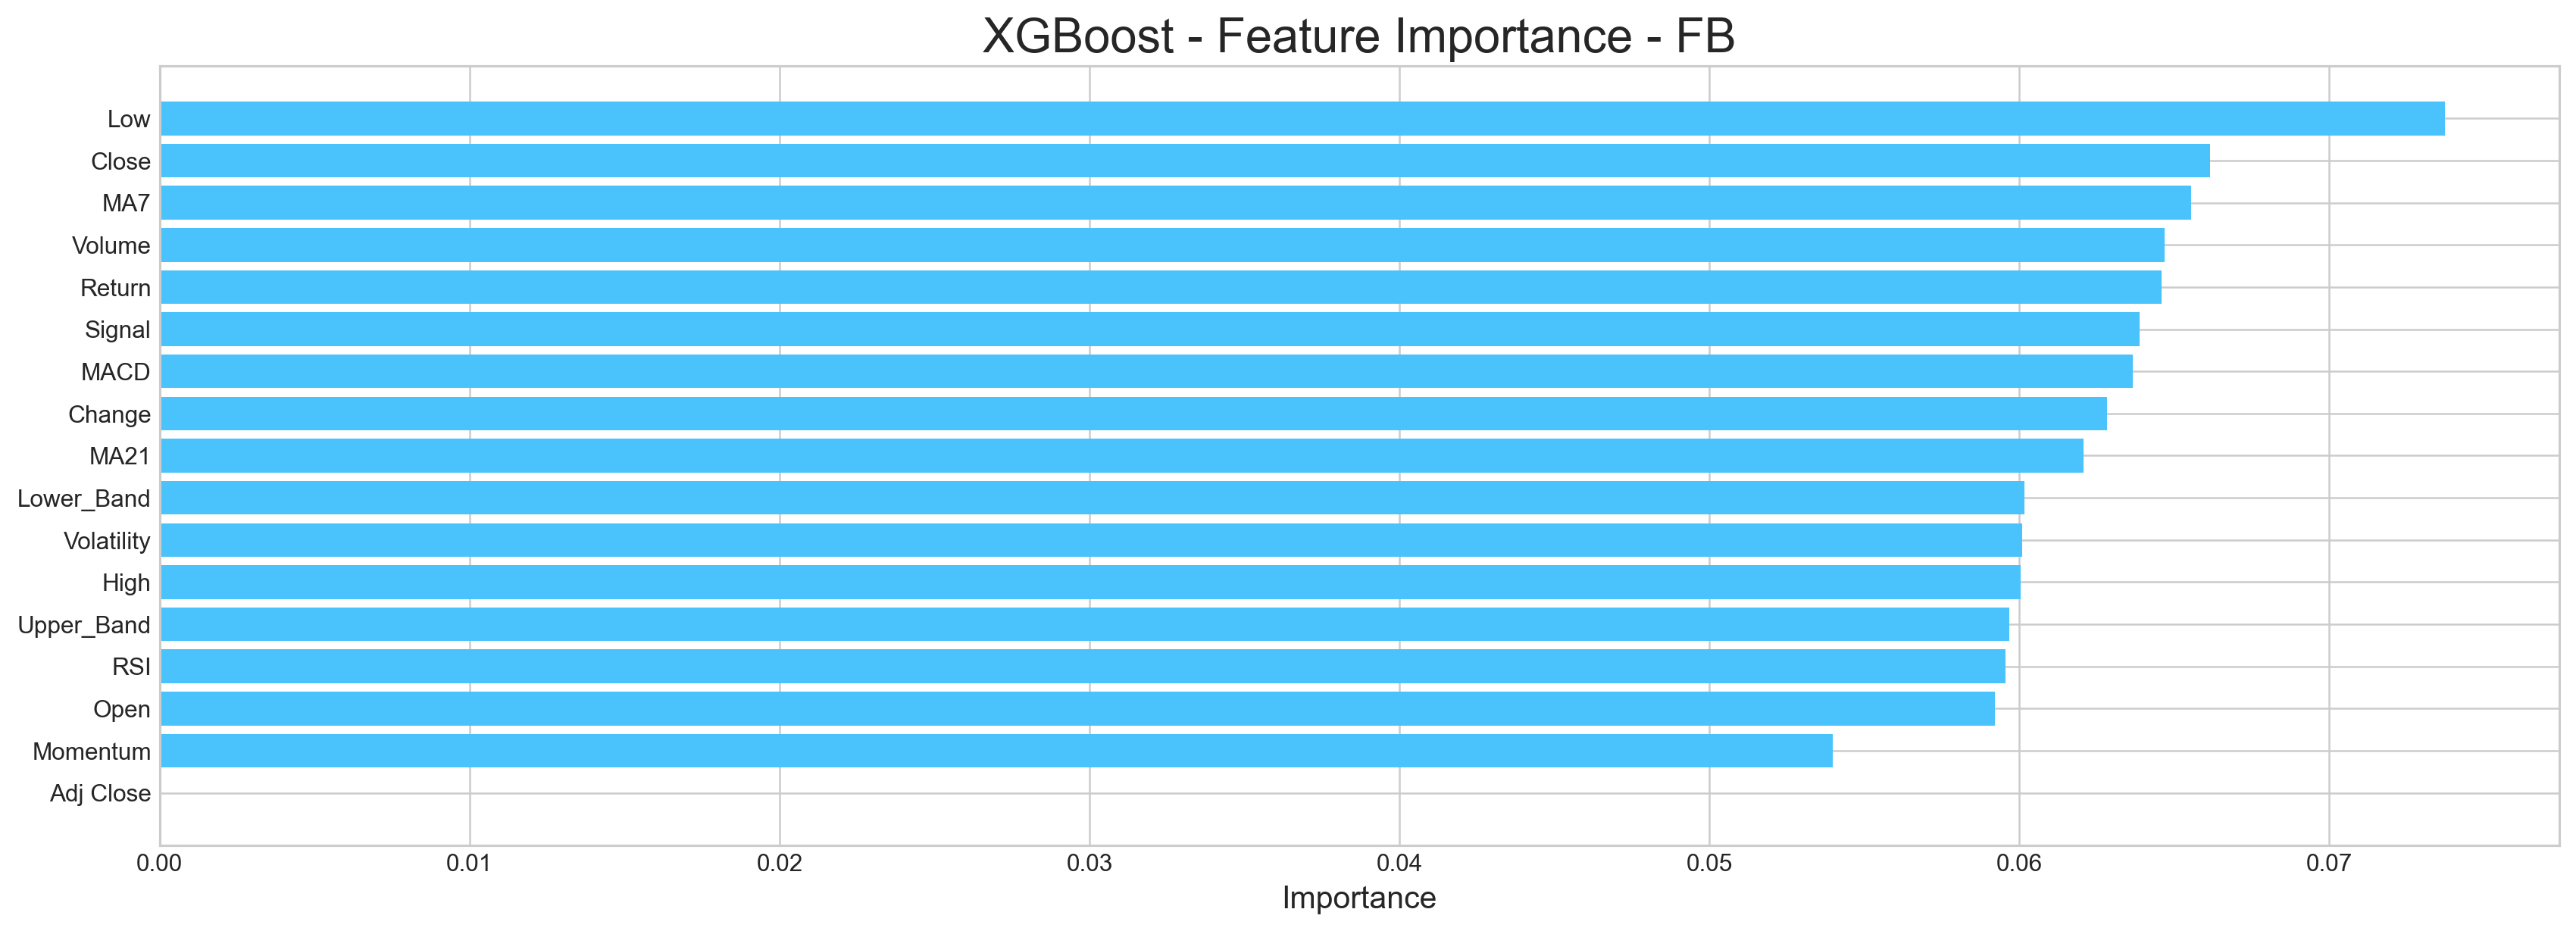

In [9]:
plt.figure(figsize=(18,6))
plt.style.use('seaborn-whitegrid')
plt.barh(important_features.Feature, important_features.Importance, color=lightblue)

plt.title(f"XGBoost - Feature Importance - {ticker.upper()}", fontsize=20)
plt.xlabel('Importance', fontsize=13)
plt.show()